## EDA Report

In [1]:
# Installing the package
#!pip3 install -U ucimlrepo 

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
from ucimlrepo import fetch_ucirepo
diabetes_dataset = fetch_ucirepo(id=296)

# access metadata
print(diabetes_dataset.metadata.uci_id)
print(diabetes_dataset.metadata.num_instances)
print(diabetes_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(diabetes_dataset.variables)

296
101766
The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalizati

In [4]:
features = diabetes_dataset.data.features # Get list of features
targets = diabetes_dataset.data.targets # Get list of targets

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

We have 47 features, which is a lot. We see which columns are mostly useless and empty

In [6]:
import pandas as pd
import numpy as np

missing_percent = features.isnull().mean() * 100

# Top value % (dominance of the most frequent value)
top_value_percent = features.apply(lambda col: col.value_counts(normalize=True, dropna=False).iloc[0] * 100)

summary = pd.DataFrame({
    'missing_%': missing_percent,
    'top_value_%': top_value_percent
})

print(summary)

                          missing_%  top_value_%
race                       2.233555    74.778413
gender                     0.000000    53.758623
age                        0.000000    25.615628
weight                    96.858479    96.858479
admission_type_id          0.000000    53.053083
discharge_disposition_id   0.000000    59.188727
admission_source_id        0.000000    56.496276
time_in_hospital           0.000000    17.447871
payer_code                39.557416    39.557416
medical_specialty         49.082208    49.082208
num_lab_procedures         0.000000     3.152330
num_procedures             0.000000    45.842423
num_medications            0.000000     5.980386
number_outpatient          0.000000    83.551481
number_emergency           0.000000    88.814535
number_inpatient           0.000000    66.456380
diag_1                     0.020636     6.742920
diag_2                     0.351787     6.634829
diag_3                     1.398306    11.354480
number_diagnoses    

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

summary = summary.reset_index()

missing_high = summary[summary['missing_%'] > 50][['index', 'missing_%']]



In [8]:
missing_high

,index,missing_%
3,weight,96.858479
20,max_glu_serum,94.746772
21,A1Cresult,83.277322


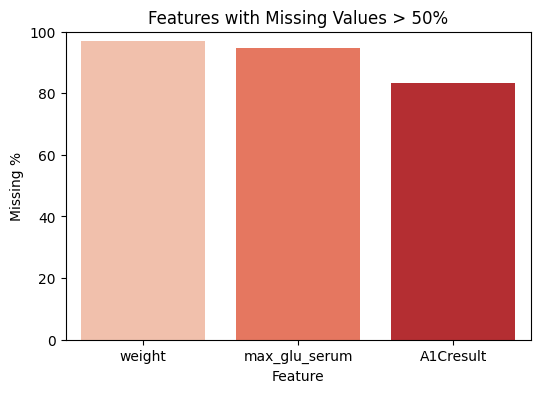

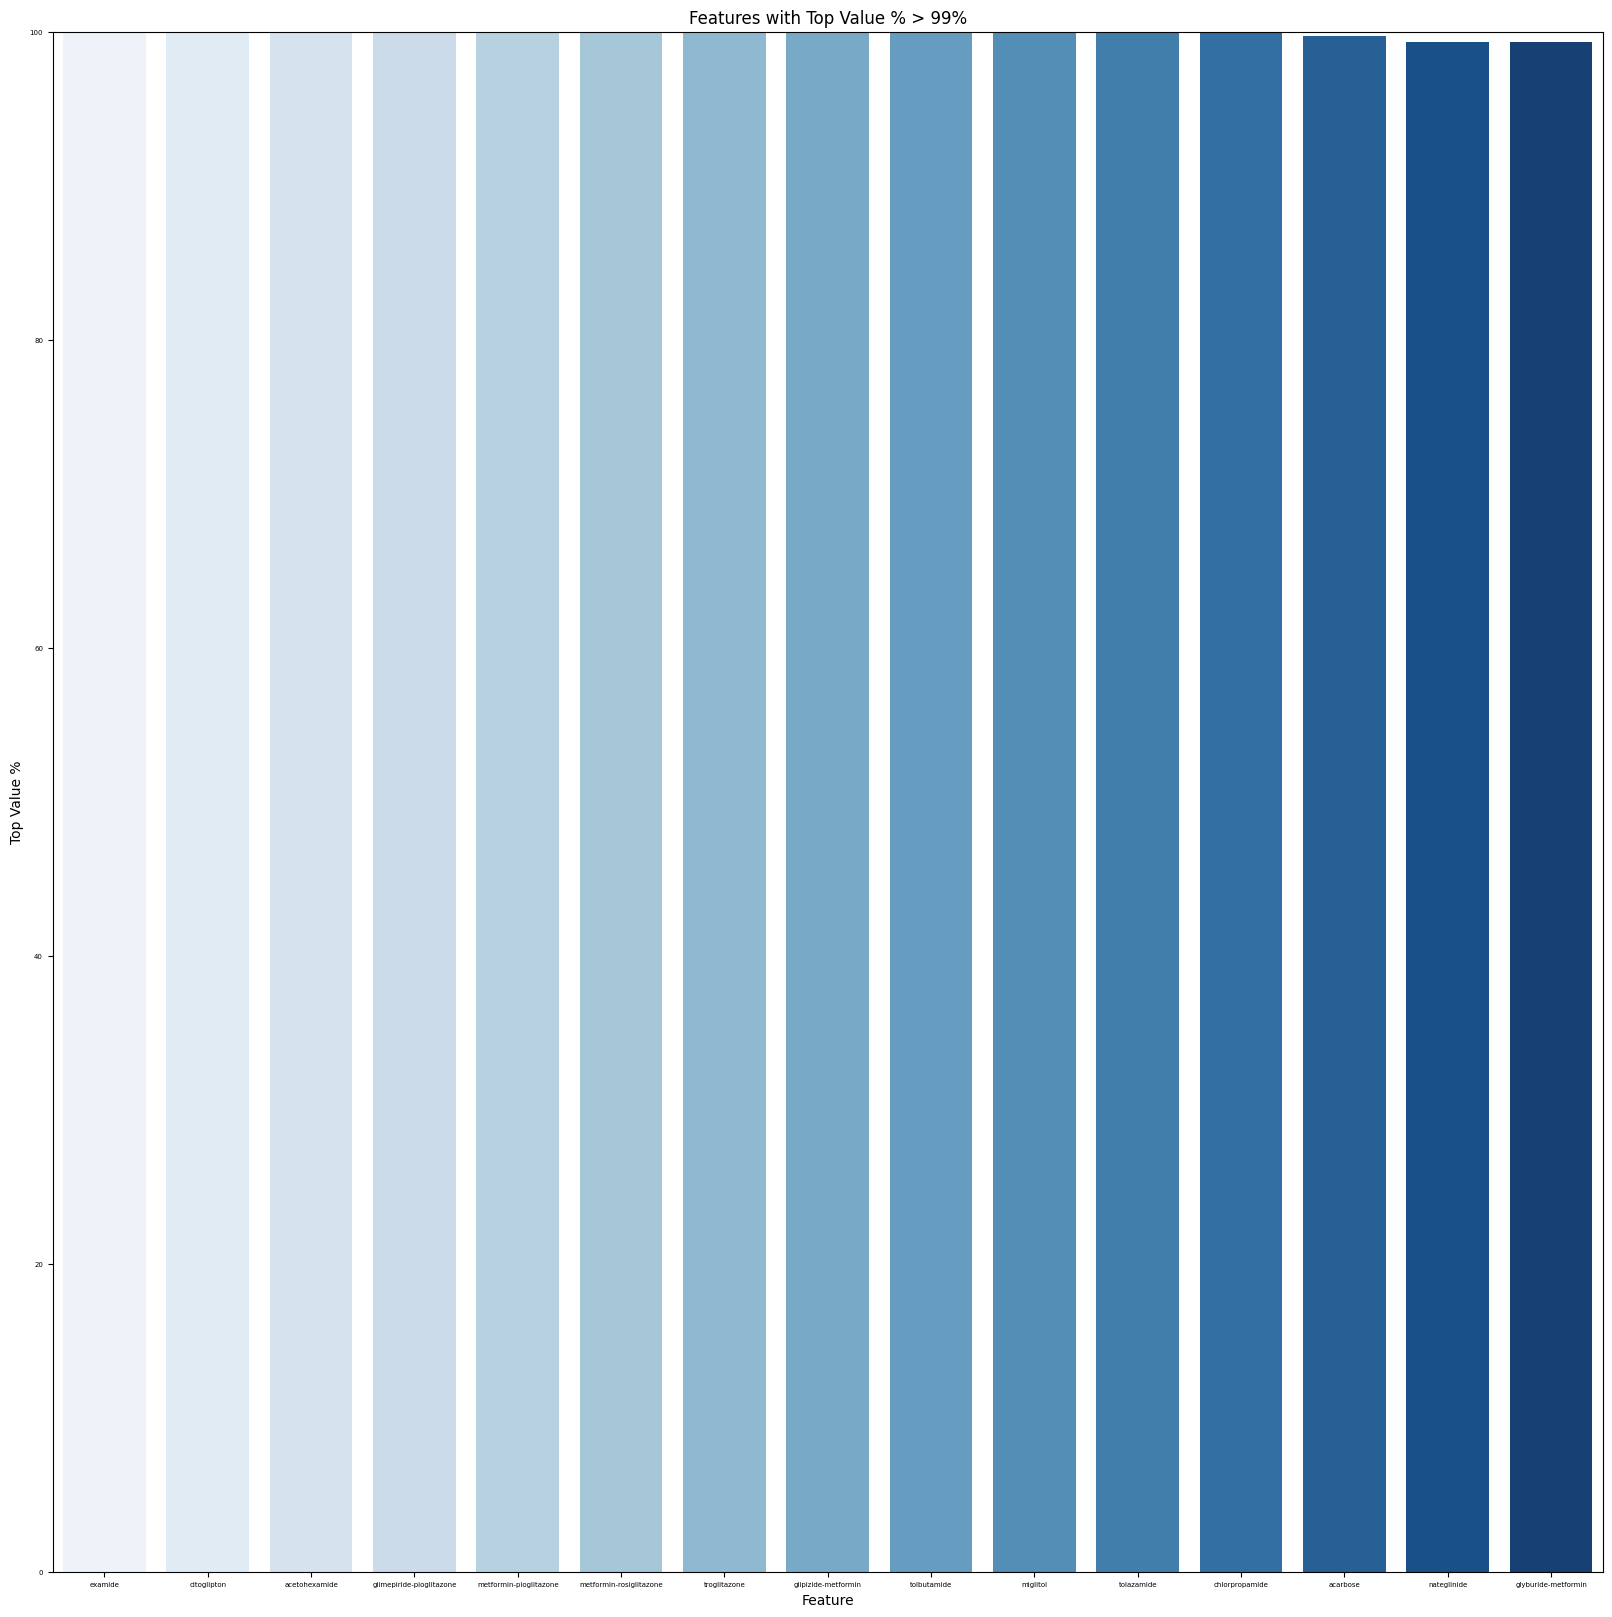

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(data=missing_high, x='index', y='missing_%', palette='Reds')
plt.title("Features with Missing Values > 50%")
plt.ylabel("Missing %")
plt.xlabel("Feature")
plt.ylim(0, 100)
plt.show()

topvalue_high = summary[summary['top_value_%'] > 99][['index', 'top_value_%']].sort_values(by = 'top_value_%', ascending = False)

plt.figure(figsize=(20, 20))
sns.barplot(data=topvalue_high, x='index', y='top_value_%', palette='Blues')
plt.title("Features with Top Value % > 99%")
plt.ylabel("Top Value %")
plt.xlabel("Feature")
plt.ylim(0, 100)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

### Initial EDA summary

1. Columns 'examide' and 'citoglipton' have constant value False. We drop these columns as it has no variance that can be used for prediction.
2. Columns 'weight', 'max_glu_serum', 'A1Cresult' have columns that have over 50% missing values. We also drop these columns as well.
3. Columns that have high percentage of same values (99% and above) we will also drop. This includes 'nateglinide','chlorpropamide', 'acetohexamide', 'tolbutamide','acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'.

In [10]:
features = features.drop(columns = ['weight', 'max_glu_serum', 'A1Cresult', 'examide', 'citoglipton','nateglinide','chlorpropamide', 'acetohexamide', 'tolbutamide','acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']) # Dropping not useful columns

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                61510 non-null   object
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

Dropped to 28 columns now.

In [12]:
features.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,No,No,No,No,No,No,Up,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,Steady,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,No,No,No,No,No,No,Up,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,No,No,Steady,No,No,No,Steady,Ch,Yes


## Some initial distribution charts

In [13]:
import os
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distributions_wordcloud(df, save_folder="charts", high_card_threshold=20):
    os.makedirs(save_folder, exist_ok=True)
    
    # Dark theme settings
    sns.set_style("darkgrid")
    plt.rcParams['figure.facecolor'] = '#1E1E1E'
    plt.rcParams['axes.facecolor'] = '#1E1E1E'
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    
    numeric_palette = sns.color_palette("coolwarm", 10)
    
    for col in df.columns:
        plt.figure(figsize=(6, 4))
        unique_vals = df[col].nunique(dropna=True)
        
        # Numeric variables
        if pd.api.types.is_numeric_dtype(df[col]) and unique_vals > 2:
            sns.histplot(df[col], kde=True, bins=20, color=numeric_palette[5])
            plt.title(f'{col} (Numeric)', fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Count', fontsize=10)
            
            # Compute stats
            stats = df[col].describe()
            skewness = df[col].skew()
            kurt = df[col].kurtosis()
            
            # Prepare annotation text
            stat_text = (
                f"Mean: {stats['mean']:.2f}\n"
                f"Median: {df[col].median():.2f}\n"
                f"Std: {stats['std']:.2f}\n"
                f"Skew: {skewness:.2f}\n"
                f"Kurt: {kurt:.2f}"
            )
            
            # Add text box inside plot
            plt.gca().text(
                0.98, 0.95, stat_text,
                transform=plt.gca().transAxes,
                fontsize=8, color='white',
                ha='right', va='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="#333333", edgecolor="white", alpha=0.6)
            )
        
        # High-cardinality categorical → Word Cloud
        elif pd.api.types.is_object_dtype(df[col]) and unique_vals > high_card_threshold:
            text = ' '.join(df[col].astype(str))
            wc = WordCloud(width=800, height=400, background_color="#1E1E1E",
                           colormap="viridis", contour_color='white', contour_width=0.5).generate(text)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'{col} (High-cardinality Word Cloud)', fontsize=12, color='white')
        
        # Moderate cardinality categorical → countplot sorted
        else:
            counts = df[col].value_counts()
            order = counts.index
            sns.countplot(data=df, x=col, palette='pastel', order=order)
            plt.title(f'{col} (Categorical)', fontsize=12)
            plt.ylabel('Count', fontsize=10)
            plt.xlabel(col, fontsize=10)
        
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.show()

        filename = os.path.join(save_folder, f"{col}_distribution.png")
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        plt.close()


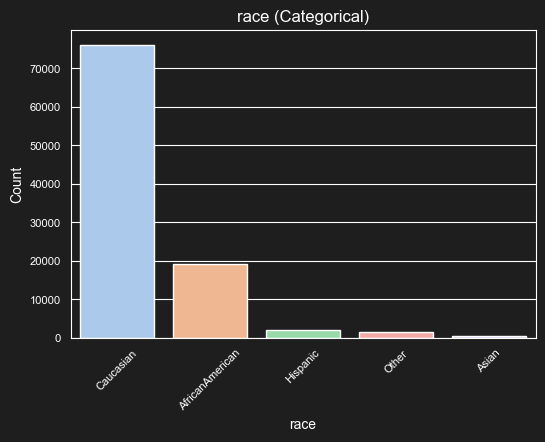

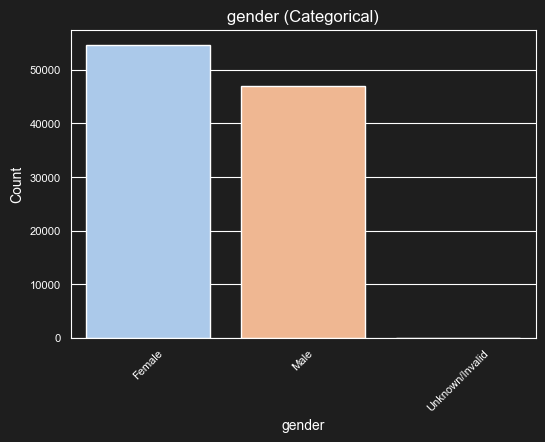

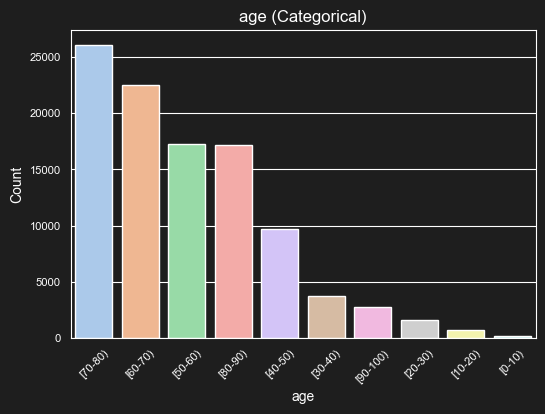

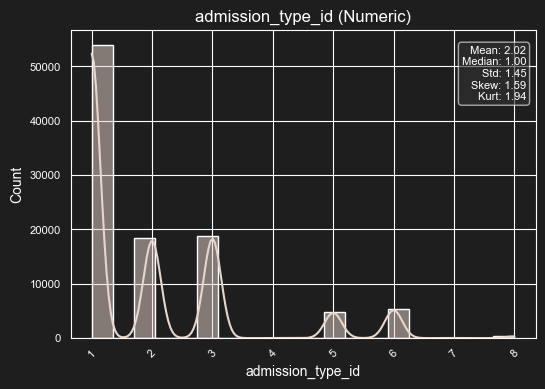

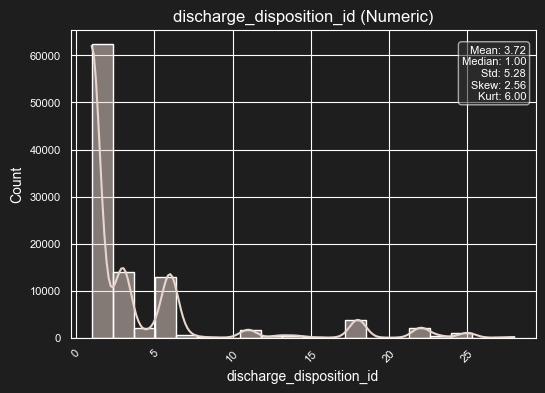

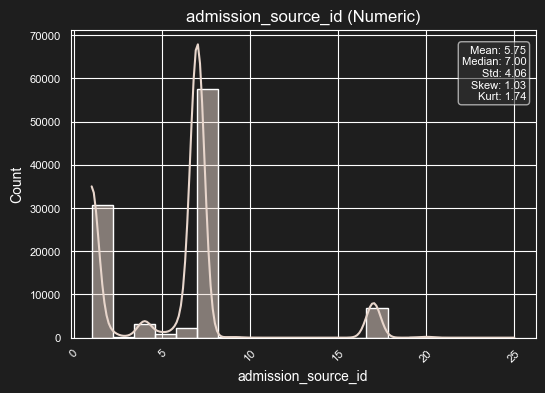

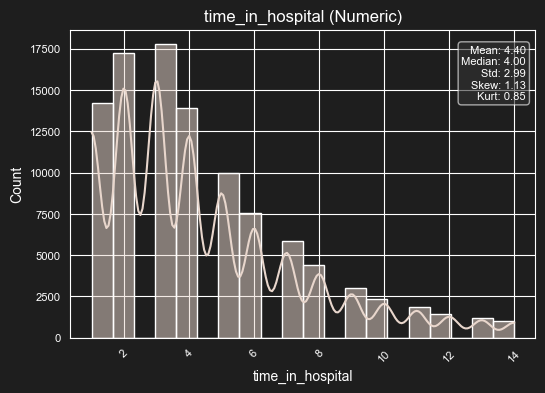

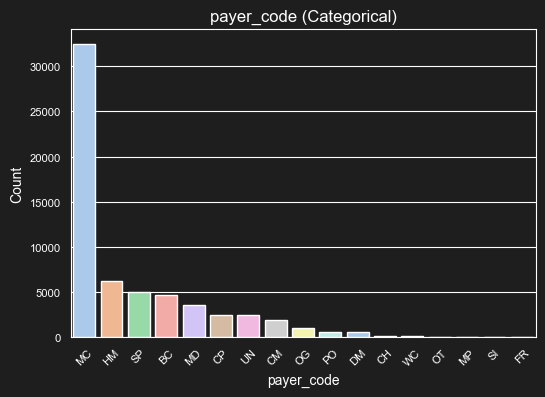

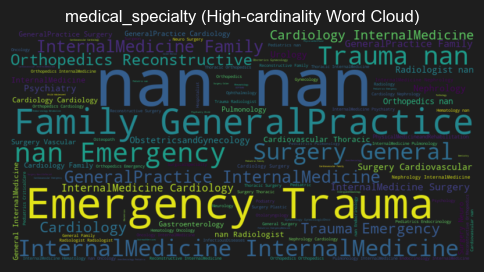

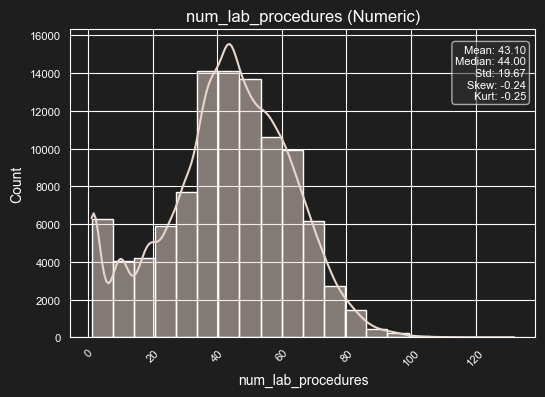

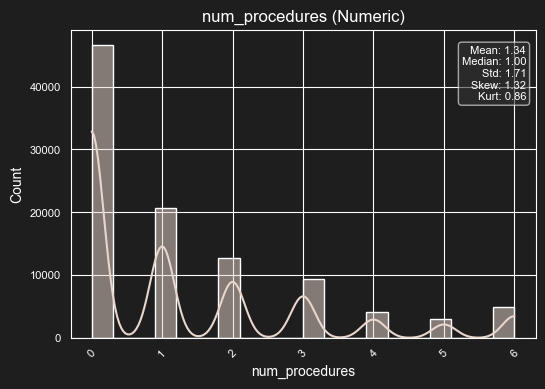

In [ ]:
plot_distributions_wordcloud(features, save_folder="charts", high_card_threshold=20)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                61510 non-null   object
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

## Cramer-V for categorical variables

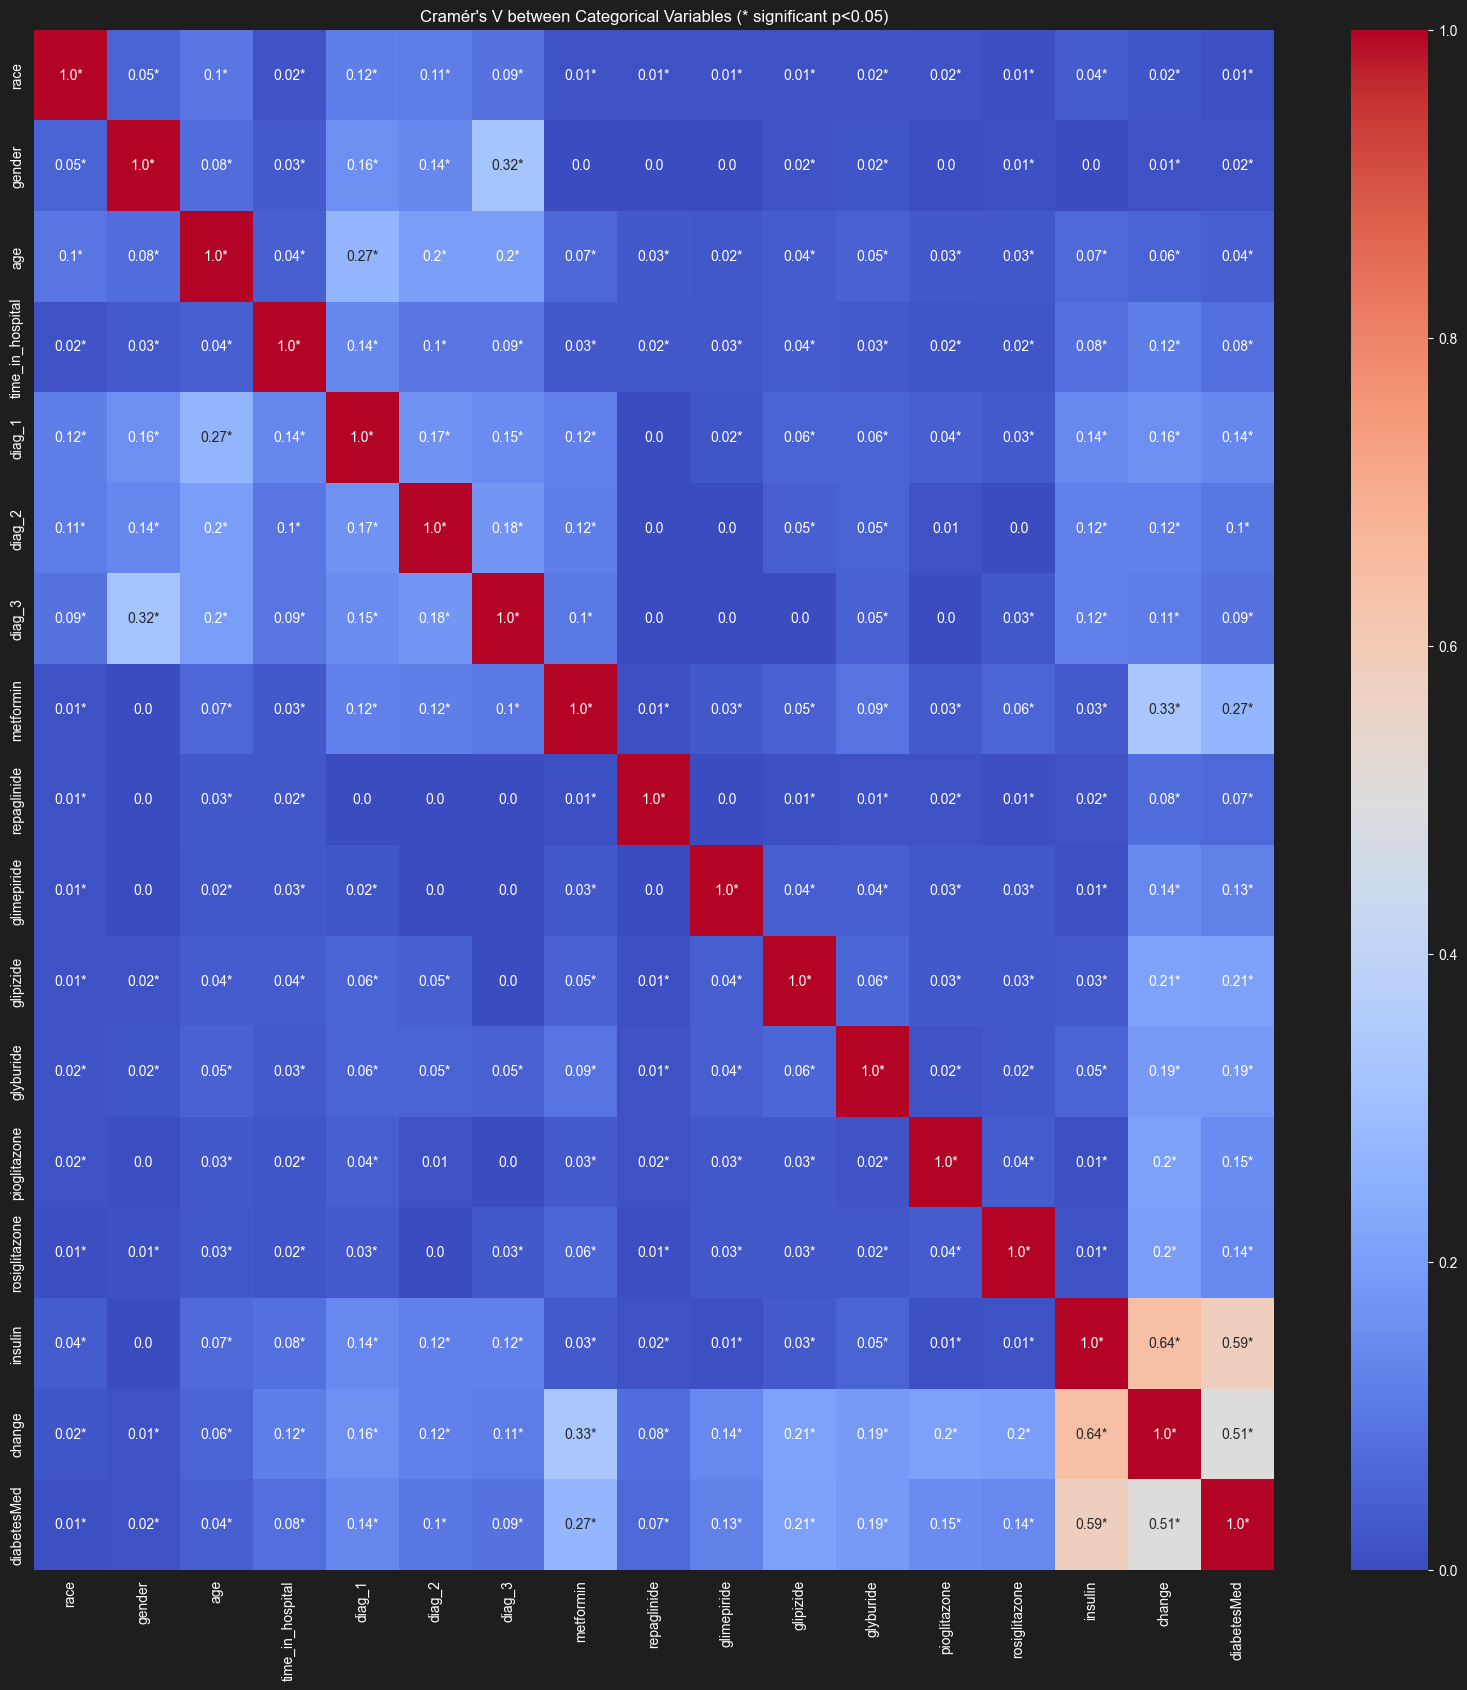

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
#    Calculate Cramér's V for categorical-categorical association.
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return v, p  # return both Cramér's V and p-value

cat_cols = ['race', 'gender', 'age', 'time_in_hospital', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide','glimepiride','glipizide', 'glyburide','pioglitazone','rosiglitazone','insulin','change','diabetesMed']
n = len(cat_cols)

cramers_matrix = pd.DataFrame(np.zeros((n, n)), index=cat_cols, columns=cat_cols)
pvalue_matrix = pd.DataFrame(np.ones((n, n)), index=cat_cols, columns=cat_cols)

# Compute pairwise Cramér's V and p-value
for i in cat_cols:
    for j in cat_cols:
        v, p = cramers_v(features[i], features[j])
        cramers_matrix.loc[i, j] = v
        pvalue_matrix.loc[i, j] = p

# Prepare annotations (add * if significant)
annotations = cramers_matrix.round(2).astype(str)
significant = pvalue_matrix < 0.05
annotations = annotations + significant.replace({True: '*', False: ''})

# Dark-themed heatmap
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.figure(figsize=(20, 20))
sns.heatmap(cramers_matrix, annot=annotations, cmap='coolwarm', vmin=0, vmax=1, fmt='')
plt.title("Cramér's V between Categorical Variables (* significant p<0.05)", fontsize=12, color='white')
plt.show()

filename = os.path.join('charts', f"cramer_v_heatmap.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()




## Target Variable

In [ ]:
targets.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [ ]:
missing_percent = targets.isnull().mean() * 100

top_value_percent = targets.apply(lambda col: col.value_counts(normalize=True, dropna=False).iloc[0] * 100)

summary = pd.DataFrame({
    'missing_%': missing_percent,
    'top_value_%': top_value_percent
})

print(summary)

            missing_%  top_value_%
readmitted        0.0    53.911916


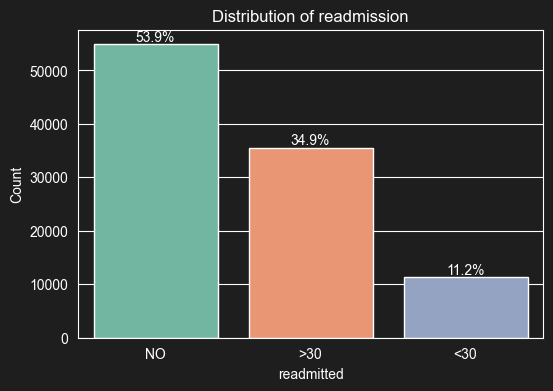

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=targets, x='readmitted', palette='Set2')
plt.title(f'Distribution of readmission', fontsize=12)
plt.xlabel('readmitted')
plt.ylabel('Count')

total = len(targets['readmitted'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.show()


             feature  cramers_v        p_value
4             diag_1   0.131831   0.000000e+00
5             diag_2   0.110470  2.970695e-223
6             diag_3   0.104835  4.000059e-182
16       diabetesMed   0.061469   1.175514e-84
3   time_in_hospital   0.050898  3.178508e-100
14           insulin   0.050092  2.126586e-108
15            change   0.045838   1.362061e-47
2                age   0.038082   9.348415e-56
7          metformin   0.022037   2.445917e-20
0               race   0.020836   5.957899e-17
8        repaglinide   0.016132   7.302647e-11
10         glipizide   0.015398   6.551146e-10
13     rosiglitazone   0.013485   1.161873e-07
1             gender   0.012822   1.447272e-07
12      pioglitazone   0.010845   4.042850e-05
9        glimepiride   0.007235   1.064076e-02
11         glyburide   0.004430   1.249143e-01


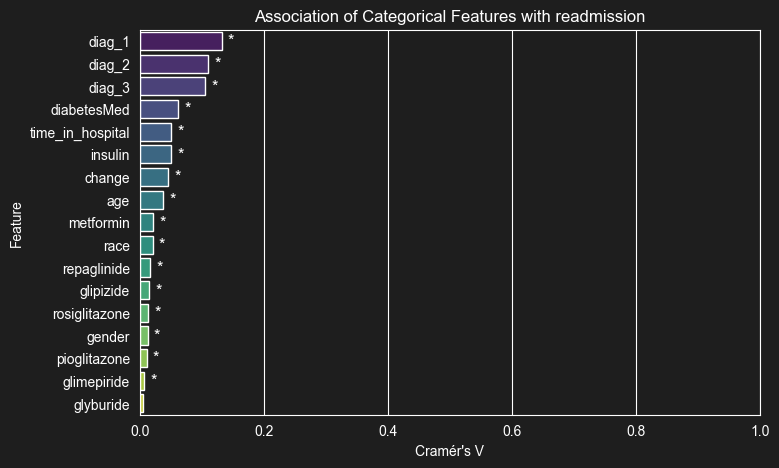

In [ ]:
cat_features = cat_cols

results = []

for col in cat_features:
    v, p = cramers_v(features[col], targets['readmitted'])
    results.append({'feature': col, 'cramers_v': v, 'p_value': p})

association_df = pd.DataFrame(results).sort_values(by='cramers_v', ascending=False)
print(association_df)

plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

ax = sns.barplot(data=association_df, x='cramers_v', y='feature', palette='viridis')

for bar, p in zip(ax.patches, association_df['p_value']):
    if p < 0.05:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(width + 0.01, y, '*', va='center', color='white', fontsize=12)

plt.xlabel("Cramér's V")
plt.ylabel("Feature")
plt.title(f"Association of Categorical Features with readmission", fontsize=12, color='white')
plt.xlim(0, 1)
plt.show()

filename = os.path.join('charts', f"cramer_v_association_with_readmission.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()

## Correlation against each other

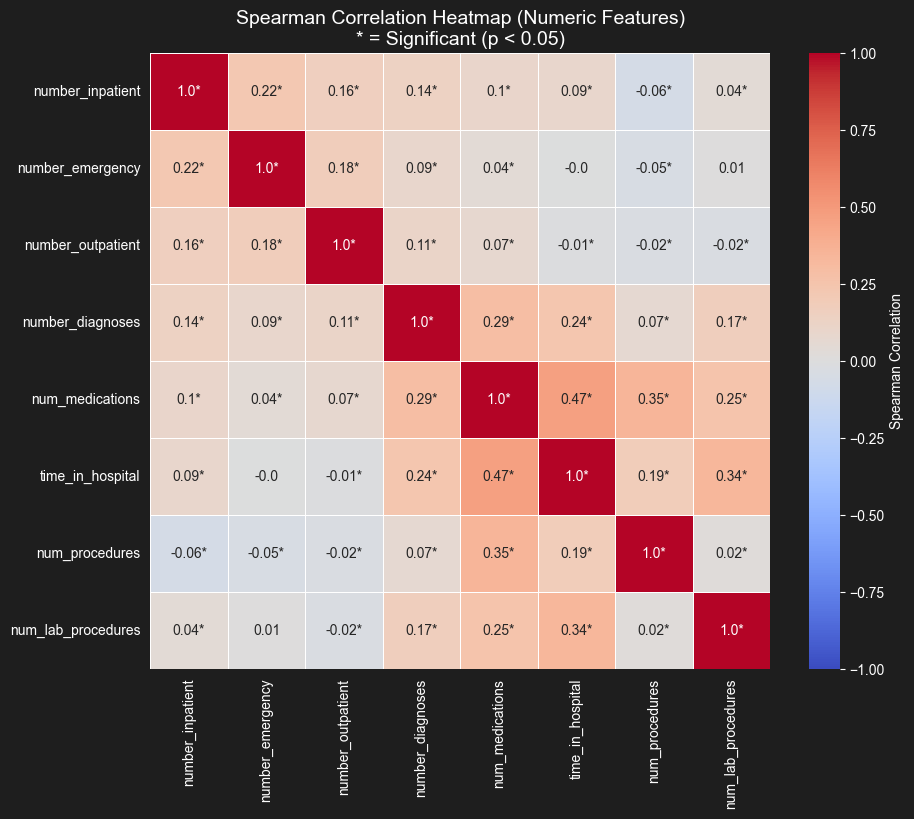

In [ ]:
from scipy.stats import spearmanr

num_cols = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital', 'num_procedures', 'num_lab_procedures']


# Initialize empty matrices
n = len(num_cols)
corr_matrix = pd.DataFrame(np.zeros((n, n)), index=num_cols, columns=num_cols)
pval_matrix = pd.DataFrame(np.ones((n, n)), index=num_cols, columns=num_cols)

# Compute pairwise Spearman correlations and p-values
for i in range(n):
    for j in range(n):
        corr, p = spearmanr(features[num_cols[i]], features[num_cols[j]], nan_policy='omit')
        corr_matrix.iloc[i, j] = corr
        pval_matrix.iloc[i, j] = p

# Create annotation matrix (correlation with stars for significance)
annotations = corr_matrix.round(2).astype(str)
stars = pval_matrix.applymap(lambda p: '*' if p < 0.05 else '')
annotations = annotations + stars

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

sns.heatmap(
    corr_matrix, 
    annot=annotations, fmt="", 
    cmap="coolwarm", vmin=-1, vmax=1, 
    linewidths=0.5, 
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.title("Spearman Correlation Heatmap (Numeric Features)\n* = Significant (p < 0.05)", fontsize=14, color='white')
plt.show()

## Spearman Correlation (numeric variables) against the target

In [ ]:
from pandas.api.types import CategoricalDtype


target_order = ['NO', '<30', '>30']

cat_type = CategoricalDtype(categories=target_order, ordered=True)
targets['target_encoded'] = targets['readmitted'].astype(cat_type).cat.codes


              feature  spearman_corr        p_value
0    number_inpatient       0.207441   0.000000e+00
1    number_emergency       0.117819   0.000000e+00
2   number_outpatient       0.109084  6.800265e-267
3    number_diagnoses       0.103599  8.505038e-241
4     num_medications       0.063024   4.462007e-90
5    time_in_hospital       0.051194   4.977306e-60
6      num_procedures      -0.048064   4.042227e-53
7  num_lab_procedures       0.038169   3.947867e-34


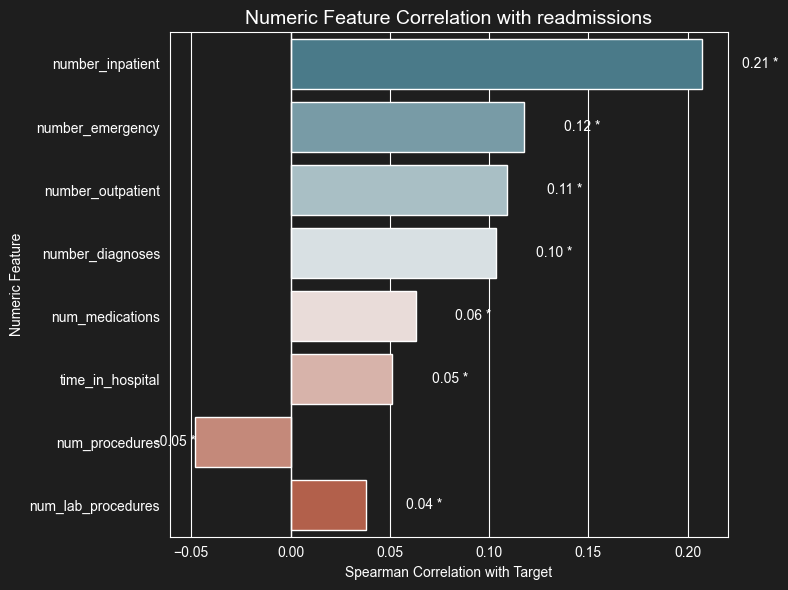

In [ ]:
numeric_features = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital', 'num_procedures', 'num_lab_procedures']

results = []
for col in numeric_features:
    rho, p_value = spearmanr(features[col], targets['target_encoded'])
    results.append({'feature': col, 'spearman_corr': rho, 'p_value': p_value})

correlation_df = pd.DataFrame(results).sort_values(by='spearman_corr', key=abs, ascending=False)

print(correlation_df)


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

ax = sns.barplot(
    data=correlation_df,
    x='spearman_corr',
    y='feature',
    palette=sns.diverging_palette(220, 20, n=len(correlation_df), center="light")
)

# Add numeric labels at the end of each bar
for bar, corr, p in zip(ax.patches, correlation_df['spearman_corr'], correlation_df['p_value']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        width + 0.02*np.sign(width), y,
        f"{corr:.2f}" + (" *" if p < 0.05 else ""),
        va='center', color='white', fontsize=10
    )

plt.xlabel("Spearman Correlation with Target")
plt.ylabel("Numeric Feature")
plt.title("Numeric Feature Correlation with readmissions", fontsize=14, color='white')
plt.axvline(0, color='white', linewidth=1)
plt.tight_layout()
plt.show()

filename = os.path.join('charts', f"spearman_correlation_association_with_readmission.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()

# Modelling

## Feature selection

1. We will take categories that are significant correlated with the target variable. This means dropping the glyburide column based on our EDA analysis
2. We will drop one of the columns that have strong correlation with each other (defined here as >0.5). We will drop the 'change' and 'diabetesMed' column given their strong correlation to the 'insulin' column.
3. We also drop all id columns given that these are administrative columns by nature.
4. This should leave us with 23 columns in total

In [ ]:
features = features.drop(columns = ['glyburide', 'change', 'diabetesMed', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'])

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   race                99493 non-null   object
 1   gender              101766 non-null  object
 2   age                 101766 non-null  object
 3   time_in_hospital    101766 non-null  int64 
 4   payer_code          61510 non-null   object
 5   medical_specialty   51817 non-null   object
 6   num_lab_procedures  101766 non-null  int64 
 7   num_procedures      101766 non-null  int64 
 8   num_medications     101766 non-null  int64 
 9   number_outpatient   101766 non-null  int64 
 10  number_emergency    101766 non-null  int64 
 11  number_inpatient    101766 non-null  int64 
 12  diag_1              101745 non-null  object
 13  diag_2              101408 non-null  object
 14  diag_3              100343 non-null  object
 15  number_diagnoses    101766 non-null  int64 
 16  me

## Train-test split

1. We train-test split the data to prevent data leakages

In [ ]:
targets = targets.drop(columns = 'readmitted')

In [ ]:
from sklearn.model_selection import train_test_split
combined_df = pd.concat([features, targets], axis=1)

X = combined_df.drop(columns=targets.columns)
y = combined_df[targets.columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique().min() > 1 else None
)


## Filling in missing data

We fill with the most common value for categorical values, and the mean for the numeric values

In [ ]:
from sklearn.impute import SimpleImputer
numeric_cols = features.select_dtypes(include=[np.number]).columns
categorical_cols = features.select_dtypes(exclude=[np.number]).columns

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test_num = numeric_imputer.transform(X_test[numeric_cols])

X_train_cat = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test_cat = categorical_imputer.transform(X_test[categorical_cols])

# Rebuild dataframes
X_train = pd.concat([
    pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index),
    pd.DataFrame(X_train_cat, columns=categorical_cols, index=X_train.index)
], axis=1)

X_test = pd.concat([
    pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index),
    pd.DataFrame(X_test_cat, columns=categorical_cols, index=X_test.index)
], axis=1)



## Feature Engineering

In general, we will apply the feature engineering to both the X_train and X_test dataset simulatenously.

### Race

We wll combine the Hispanic, Other and Asian values into one Other given the low percentage of those categories.

In [ ]:
X_train['race'] = X_train['race'].replace(['Hispanic', 'Asian'], 'Other')
X_test['race'] = X_test['race'].replace(['Hispanic', 'Asian'], 'Other')

In [ ]:
X_train['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other'], dtype=object)

### Gender

For gender, given the very low count of unknown/invalid (3), we can transform it into Female 

In [ ]:
X_train['gender'] = X_train['gender'].replace(['Unknown/Invalid'], 'Female')
X_test['gender'] = X_test['gender'].replace(['Unknown/Invalid'], 'Female')

### Age

We group those 0-30 groups into one group given the low count for all these categories

In [ ]:
X_train['age'].value_counts(normalize = True)

age
[70-80)     0.255233
[60-70)     0.221294
[50-60)     0.169484
[80-90)     0.168894
[40-50)     0.095711
[30-40)     0.037587
[90-100)    0.027084
[20-30)     0.016423
[10-20)     0.006817
[0-10)      0.001474
Name: proportion, dtype: float64

In [ ]:
X_train['age']= X_train['age'].replace(['[0-10)', '[10-20)', '[20-30)'], '[0-30)')
X_test['age']= X_test['age'].replace(['[0-10)', '[10-20)', '[20-30)'], '[0-30)')

### Time in hospital

We log this variable given that the distribution is skewed. We then standardize it using scikit learn standard scaler

In [ ]:
X_train['time_in_hospital'].value_counts(normalize=  True)

time_in_hospital
3.0     0.175343
2.0     0.170012
1.0     0.139734
4.0     0.136270
5.0     0.098585
6.0     0.073933
7.0     0.056712
8.0     0.042610
9.0     0.029332
10.0    0.022834
11.0    0.018105
12.0    0.014150
13.0    0.012185
14.0    0.010195
Name: proportion, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train['time_in_hospital'] = np.log1p(X_train['time_in_hospital'])
time_scaler = StandardScaler()
X_train['time_in_hospital'] = time_scaler.fit_transform(X_train[['time_in_hospital']])
X_test['time_in_hospital'] = time_scaler.transform(X_test[['time_in_hospital']])


### Payer Code

1. We combine code that are less than 1 percent together as one 'Others' category

In [ ]:
# Step 1: Calculate frequency in the training set
freq = X_train['payer_code'].value_counts(normalize=True)

# Step 2: Keep only categories that are >= 1%
major_categories = freq[freq >= 0.01].index

# Step 3: Replace rare categories in training set with 'Others'
X_train['payer_code'] = X_train['payer_code'].apply(
    lambda x: x if x in major_categories else 'Others'
)

# Step 4: Apply the same logic to test set
X_test['payer_code'] = X_test['payer_code'].apply(
    lambda x: x if x in major_categories else 'Others'
)


### Medical specialty

1. Similar to payer code

In [ ]:
# Step 1: Calculate frequency in the training set
freq = X_train['medical_specialty'].value_counts(normalize=True)

# Step 2: Keep only categories that are >= 1%
major_categories = freq[freq >= 0.01].index

# Step 3: Replace rare categories in training set with 'Others'
X_train['medical_specialty'] = X_train['medical_specialty'].apply(
    lambda x: x if x in major_categories else 'Others'
)

# Step 4: Apply the same logic to test set
X_test['medical_specialty'] = X_test['medical_specialty'].apply(
    lambda x: x if x in major_categories else 'Others'
)


In [ ]:
X_train['medical_specialty'].value_counts()

medical_specialty
InternalMedicine              51749
Others                         6651
Emergency/Trauma               6010
Family/GeneralPractice         5964
Cardiology                     4229
Surgery-General                2468
Nephrology                     1294
Orthopedics                    1124
Orthopedics-Reconstructive     1004
Radiologist                     919
Name: count, dtype: int64

### Number of lab procedures

1. The distribution is close to a normal distribution already. We can just standard scale it.

In [ ]:
lab_scaler = StandardScaler()
X_train['num_lab_procedures'] = lab_scaler.fit_transform(X_train[['num_lab_procedures']])
X_test['num_lab_procedures'] = lab_scaler.transform(X_test[['num_lab_procedures']])


### Number of medications

1. Log transform then standard scaler

In [ ]:
X_train['num_medications'] = np.log1p(X_train['num_medications'])
medication_scaler = StandardScaler()
X_train['num_medications'] = medication_scaler.fit_transform(X_train[['num_medications']])
X_test['num_medications'] = medication_scaler.transform(X_test[['num_medications']])


### Number of outpatient/ emergency /inpatient

1. Change into a categorical column instead - 0, 1 or more than 1

In [ ]:
cols_to_bucket = ['number_emergency', 'number_inpatient', 'number_outpatient']

for col in cols_to_bucket:
    X_train[col] = X_train[col].apply(lambda x: 'More than one' if x > 1 else str(int(x)))
    X_train[col] = X_train[col].astype('category')
    
    X_test[col] = X_test[col].apply(lambda x: 'More than one' if x > 1 else str(int(x)))
    X_test[col] = X_test[col].astype('category')


### Diagnosis categories

1. Apply frequency encoding to change it from a high cardinality column into a numeric one based on the proportion of times it appears in the training dataset.

In [ ]:
cols_to_encode = ['diag_1', 'diag_2', 'diag_3']

for col in cols_to_encode:
    # Compute frequency on training set, ignoring NaNs
    freq = X_train[col].value_counts(dropna=True) / X_train[col].notna().sum()
    
    # Map training set; keep NaN as NaN
    X_train[col + '_freq'] = X_train[col].map(freq)
    
    # Map test set; unseen categories become 0, NaN stays NaN
    X_test[col + '_freq'] = X_test[col].map(freq).fillna(0)
    
    # Drop original column
    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)


In [ ]:
X_train['diag_1_freq'].value_counts()

diag_1_freq
0.067791    5519
0.064683    5266
0.039540    3219
0.035326    2876
0.034405    2801
            ... 
0.000626      51
0.000590      48
0.000540      44
0.000160      39
0.000393      32
Name: count, Length: 191, dtype: int64

### Number of diagnoses

1. Given the right skew nature, we don't log transform as it will make it worse. Instead, we apply a Yeo-Johnson transformation to minimise the right skew instead.

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

X_train[['number_diagnoses']] = pt.fit_transform(X_train[['number_diagnoses']])

X_test[['number_diagnoses']] = pt.transform(X_test[['number_diagnoses']])


### Different medical conditions

In [ ]:
cols_to_binarize = ['metformin', 'repaglinide', 'glimepiride',
                     'glipizide', 'pioglitazone', 'rosiglitazone']

for col in cols_to_binarize:
    X_train[col] = X_train[col].apply(lambda x: 'No' if x == 'No' else 'Yes')
    
    X_test[col] = X_test[col].apply(lambda x: 'No' if x == 'No' else 'Yes')


### One-hot encode

1. One hot encode the category and object columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 1️⃣ Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# 2️⃣ Create the encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 3️⃣ Fit on X_train and transform both train and test
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])

# 4️⃣ Convert to DataFrame with proper column names
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)

# 5️⃣ Drop original categorical columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), X_test_ohe], axis=1)


We have a 66 columns after that